# Here this code plots different possible known paths and their corressponding times of traversal

Clearly, we can see that the cycloidal path takes least time for a body to go in a vertical plane from a given start point to given end point.

The gravity here is downward, i.e. from y=0 to y=-0.5 direction.
The ball moves from (0,0) to (1,0.5)

Time of traversal for a cycloid path = 0.570
Time of traversal for a circular path = 0.587
Time of traversal for a parabolic path = 0.583
Time of traversal for a straight line path= 0.714


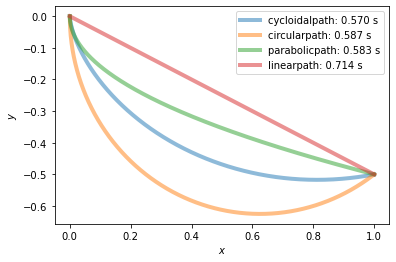

In [18]:
import numpy as np
from scipy.optimize import newton
from scipy.integrate import quad
import matplotlib.pyplot as plt

g = 9.81
x2, y2 = 1, 0.5

def cycloidalpath(x2, y2, N=1000):

    # First find theta2 from (x2, y2) numerically (by Newton-Rapheson).
    def f(theta):
        return y2/x2 - (1-np.cos(theta))/(theta-np.sin(theta))
    theta2 = newton(f, np.pi/2)

    # The radius of the circle generating the cycloid.
    R = y2 / (1 - np.cos(theta2))

    theta = np.linspace(0, theta2, N)
    x = R * (theta - np.sin(theta))
    y = R * (1 - np.cos(theta))

    T = theta2 * np.sqrt(R / g)
    print('Time of traversal for a cycloid path = {:.3f}'.format(T))
    return x, y, T

def linearpath(x2, y2, N=1000):
    
    m = y2 / x2
    x = np.linspace(0, x2, N)
    y = m*x

    # The time of travel
    T = np.sqrt(2*(1+m**2)/g/m * x2)
    print('Time of traversal for a straight line path= {:.3f}'.format(T))
    return x, y, T

def func(x, f, fp):
    """The integrand of the time integral to be minimized for a path f(x)."""

    return np.sqrt((1+fp(x)**2) / (2 * g * f(x)))

def circularpath(x2, y2, N=1000):

    # Circle radius
    r = (x2**2 + y2**2)/2/x2

    def f(x):
        return np.sqrt(2*r*x - x**2)
    def fp(x):
        return (r-x)/f(x)

    x = np.linspace(0, x2, N)
    y = f(x)

    # Calcualte the time of travel by numerical integration.
    T = quad(func, 0, x2, args=(f, fp))[0]
    print('Time of traversal for a circular path = {:.3f}'.format(T))
    return x, y, T

def parabolicpath(x2, y2, N=1000):
  
    c = (y2/x2)**2

    def f(x):
        return np.sqrt(c*x)
    def fp(x):
        return c/2/f(x)

    x = np.linspace(0, x2, N)
    y = f(x)

    # Calcualte the time of travel by numerical integration.
    T = quad(func, 0, x2, args=(f, fp))[0]
    print('Time of traversal for a parabolic path = {:.3f}'.format(T))
    return x, y, T

# Plot a figure comparing the four paths.
fig, ax = plt.subplots()

for curve in ('cycloidalpath', 'circularpath', 'parabolicpath', 'linearpath'):
    x, y, T = globals()[curve](x2, y2)
    ax.plot(x,-y, lw=4, alpha=0.5, label='{}: {:.3f} s'.format(curve, T))
ax.legend()

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.savefig('brachistochrone.png')
plt.show()

This code finds the total time taken for traversal, given a set of yk's, as described in the project report.

In [17]:
def findtime(ysol):

    #ysol is an array of y values where each y corresponds to each x in xarray
    #given y values for each of the x values in xarray,get time of descent for 
    #a point moving along the path formed by these y values and x values from xarray.
    timetotal=0
    for i in range(len(ysol)-1):

        #calculate time for body to go from (xarray[i],ysol[i]) to (xarray[i+1],ysol[i+1])
        #for descent on a frictionless plane in gravity, a body's velocity 
        #is determined solely by its loss in potential energy due to conservation of energy
        vel=torch.sqrt(0.65-((ysol[i]+ysol[i+1])/2))*torch.sqrt(torch.tensor(2)*torch.tensor(9.81)) 
        
        xdiff=xarray[i+1]-xarray[i]
        ydiff=ysol[i+1]-ysol[i]

        #distance covered = (deltax**2+deltay**2)**1/2
    
        dist=torch.sqrt(xdiff.pow(2)+ydiff.pow(2))
        timei=dist/vel
        #print(timei)
        #add times taken to get total time.
        timetotal=timetotal+timei
    return timetotal

In [6]:
#import necessary python libraries

import numpy as np
import torch
import matplotlib.pyplot as plt

g=torch.tensor(9.81) #acceleration due to gravity.

#initial and final coordinates of the path
xi,yi= torch.tensor(0),torch.tensor(0.5)
xf,yf= torch.tensor(1),torch.tensor(0)

npoints=100 #resolution of the brachistochrone curve

#get npoints equally seperated points from xi to xf. and yi to yf
xarray=torch.linspace(xi,xf,npoints) 
ysol=torch.linspace(yi,yf,npoints, requires_grad=True) #starting with a straight line solution.

def findtime(ysol):

    #ysol is an array of y values where each y corresponds to each x in xarray
    #given y values for each of the x values in xarray,get time of descent for 
    #a point moving along the path formed by these y values and x values from xarray.
    timetotal=0
    for i in range(len(ysol)-1):

        #calculate time for body to go from (xarray[i],ysol[i]) to (xarray[i+1],ysol[i+1])
        #for descent on a frictionless plane in gravity, a body's velocity 
        #is determined solely by its loss in potential energy due to conservation of energy
        vel=torch.sqrt(yi-(ysol[i+1]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel+torch.sqrt(yi-(ysol[i]))*torch.sqrt(torch.tensor(2)*g) 
        vel=vel/2
        xdiff=xarray[i+1]-xarray[i]
        ydiff=ysol[i+1]-ysol[i]

        #distance covered = (deltax**2+deltay**2)**1/2
    
        dist=torch.sqrt(xdiff.pow(2)+ydiff.pow(2))
        timei=dist/vel
        #print(timei)
        #add times taken to get total time.
        timetotal=timetotal+timei
    return timetotal


#using gradient descent to arrive at a better curve, i.e. one that reduces total time

learning_rate=0.005
num_descents=20000 #number of times gradient descent is employed
for i in range(num_descents):

    totalt=findtime(ysol)
    if i ==0:
        print(totalt)
    #find gradients of totalt wrt yarray.
    totalt.backward()

    gradients=ysol.grad
    #update ysol in array
    with torch.no_grad():
        #update all y values except initial and final states
        ysol[1:-1]=ysol[1:-1]-learning_rate*gradients[1:-1]
    ysol.grad.data.zero_()

tensor(0.7139, grad_fn=<AddBackward0>)


The above printed value is time of traversal time if path is a straight line.
The below shown is the optimal path, cycloid, confirmed by the time of traversal being 0.5702, as was calculated in the first cell.

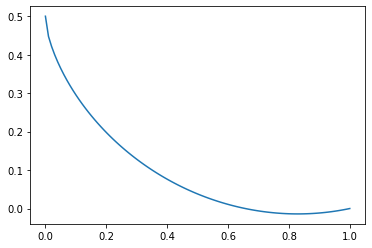

In [7]:
plt.plot(xarray,ysol.detach().cpu().numpy())

In [4]:
totalt

tensor(0.5702, grad_fn=<AddBackward0>)

The total time of traversal is printed above.